<a href="https://colab.research.google.com/github/cyrus723/my-first-binder/blob/main/wrds_crsp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wrds

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.0 MB 6.6 MB/s 


In [2]:
import wrds

In [5]:
# Now I am connecting to WRDS site - you must ahve a WRDS account user id and password
conn=wrds.Connection()

Enter your WRDS username [root]:hy11
Enter your password:··········
WRDS recommends setting up a .pgpass file.
Create .pgpass file now [y/n]?: y
Created .pgpass file successfully.
Loading library list...
Done


In [6]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [7]:
help(wrds)

Help on package wrds:

NAME
    wrds

DESCRIPTION
    WRDS Python Data Access Library
    
    WRDS-Py is a library for extracting data from WRDS data sources and getting it into Pandas.
    
        >>> import wrds
        >>> db = wrds.Connection()
        >>> db.list_libraries()
        ['aha', 'aha_sample', 'ahasamp', 'audit', 'audit_audit_comp', ...]
        >>> db.list_tables(library='crsp')
        ['acti', 'asia', 'asib', 'asic', 'asio', 'asix', 'bmdebt', 'bmheader', ...]
        >>> data = db.raw_sql('SELECT * FROM crsp.stocknames', index_col='permno')
        >>> data.head()
                 permco      namedt   nameenddt     cusip    ncusip ticker      permno
        10000.0  7952.0  1986-01-07  1987-06-11  68391610  68391610  OMFGA
        10001.0  7953.0  1986-01-09  1993-11-21  36720410  39040610   GFGC
        10001.0  7953.0  1993-11-22  2008-02-04  36720410  29274A10   EWST
        10001.0  7953.0  2008-02-05  2009-08-03  36720410  29274A20   EWST
        10001.0  7953

In [8]:
#listing all dtabases or libraries in WRDS
conn.list_libraries()

['compbd',
 'compgd',
 'compnad',
 'compsegd',
 'crspa',
 'evts',
 'issm',
 'nastraq',
 'tass',
 'wrds_lib_internal',
 'aha',
 'estimize',
 'levin',
 'ciqsamp_capstrct',
 'toyo',
 'ahasamp',
 'ciqsamp_pplintel',
 'crspm',
 'tresgsmp',
 'trsdcgs',
 'columnar',
 'trws',
 'lspd',
 'twoiq',
 'wcai',
 'tresg',
 'wind',
 'wqa',
 'msrb_all',
 'custom_jl',
 'risk',
 'centris',
 'wrdsapps_link_supplychain',
 'block_all',
 'zacks',
 'crsp',
 'contrib',
 'audit',
 'boardex_trial',
 'emdb',
 'calcbnch',
 'comp_na_monthly_all',
 'auditsmp',
 'boardsmp',
 'comp_segments_hist',
 'wrdsrpts_rep_usage',
 'public_all',
 'pwt_all',
 'msfanly',
 'etfg',
 'snlsamp_fig',
 'wrdsapps_backtest_plus',
 'pacap',
 'ciqsamp_transcripts',
 'ciq',
 'tr_ds',
 'ppublica',
 'crsp_a_stock',
 'preqin',
 'etfg_samp',
 'fisdsamp',
 'windsmp',
 'rent',
 'sustainalyticssamp_all',
 'wrdsapps_evtstudy_int_ginsight',
 'compmcur',
 'tr_dealscan',
 'markit',
 'secsamp_all',
 'rpna',
 'ibes',
 'rpa',
 'sdcsamp',
 'wrdssec_midas',
 

In [9]:
#listing CRSP files
conn.list_tables(library="crspa")

['acti',
 'asia',
 'asib',
 'asic',
 'asio',
 'asix',
 'bmdebt',
 'bmheader',
 'bmpaymts',
 'bmquotes',
 'bmyield',
 'bndprt06',
 'bndprt12',
 'bxcalind',
 'bxdlyind',
 'bxmthind',
 'bxquotes',
 'bxyield',
 'ccm_lookup',
 'ccm_qvards',
 'ccmxpf_linktable',
 'ccmxpf_lnkhist',
 'ccmxpf_lnkrng',
 'ccmxpf_lnkused',
 'comphead',
 'comphist',
 'compmaster',
 'crsp_daily_data',
 'crsp_header',
 'crsp_monthly_data',
 'crsp_names',
 'crsp_ziman_daily_index',
 'crsp_ziman_monthly_index',
 'cs20yr',
 'cs5yr',
 'cs90d',
 'cst_hist',
 'dport1',
 'dport2',
 'dport3',
 'dport4',
 'dport5',
 'dport6',
 'dport7',
 'dport8',
 'dport9',
 'dsbc',
 'dsbo',
 'dse',
 'dse62',
 'dse62delist',
 'dse62dist',
 'dse62exchdates',
 'dse62names',
 'dse62nasdin',
 'dse62shares',
 'dseall',
 'dseall62',
 'dsedelist',
 'dsedist',
 'dseexchdates',
 'dsenames',
 'dsenasdin',
 'dseshares',
 'dsf',
 'dsf62',
 'dsfhdr',
 'dsfhdr62',
 'dsi',
 'dsi62',
 'dsia',
 'dsib',
 'dsic',
 'dsio',
 'dsir',
 'dsix',
 'dsiy',
 'dsp500',


In [10]:
#listing CRSP dsf file or table
conn.describe_table('crsp', 'dsf')

Approximately 101070400 rows in crsp.dsf.


,name,nullable,type
0,cusip,True,VARCHAR(8)
1,permno,True,DOUBLE_PRECISION
2,permco,True,DOUBLE_PRECISION
3,issuno,True,DOUBLE_PRECISION
4,hexcd,True,DOUBLE_PRECISION
5,hsiccd,True,DOUBLE_PRECISION
6,date,True,DATE
7,bidlo,True,DOUBLE_PRECISION
8,askhi,True,DOUBLE_PRECISION
9,prc,True,DOUBLE_PRECISION


In [11]:
#listing CRSP dsf file or table
conn.describe_table('crspm', 'dsfhdr')

Approximately 36564 rows in crspm.dsfhdr.


,name,nullable,type
0,permno,True,DOUBLE_PRECISION
1,permco,True,DOUBLE_PRECISION
2,hshrcd,True,DOUBLE_PRECISION
3,dlstcd,True,DOUBLE_PRECISION
4,hcusip,True,VARCHAR(8)
5,htick,True,VARCHAR(8)
6,hcomnam,True,VARCHAR(35)
7,htsymbol,True,VARCHAR(10)
8,hnaics,True,VARCHAR(7)
9,hprimexc,True,VARCHAR(1)


In [ ]:
#listing CRSP dsf file or table
conn.describe_table('crsp', 'dsfhdr')

Approximately 36437 rows in crsp.dsfhdr.


,name,nullable,type
0,permno,True,DOUBLE_PRECISION
1,permco,True,DOUBLE_PRECISION
2,hshrcd,True,DOUBLE_PRECISION
3,dlstcd,True,DOUBLE_PRECISION
4,hcusip,True,VARCHAR(8)
5,htick,True,VARCHAR(8)
6,hcomnam,True,VARCHAR(35)
7,htsymbol,True,VARCHAR(10)
8,hnaics,True,VARCHAR(7)
9,hprimexc,True,VARCHAR(1)


In [ ]:
conn.describe_table('crsp', 'dse')

Approximately 12127940 rows in crsp.dse.


,name,nullable,type
0,event,True,VARCHAR(8)
1,date,True,DATE
2,hsicmg,True,DOUBLE_PRECISION
3,hsicig,True,DOUBLE_PRECISION
4,comnam,True,VARCHAR(32)
5,cusip,True,VARCHAR(8)
6,dclrdt,True,DATE
7,dlamt,True,DOUBLE_PRECISION
8,dlpdt,True,DATE
9,dlstcd,True,DOUBLE_PRECISION


In [ ]:
conn.describe_table('crspm', 'dsf')

Approximately 101263896 rows in crspm.dsf.


,name,nullable,type
0,cusip,True,VARCHAR(8)
1,permno,True,DOUBLE_PRECISION
2,permco,True,DOUBLE_PRECISION
3,issuno,True,DOUBLE_PRECISION
4,hexcd,True,DOUBLE_PRECISION
5,hsiccd,True,DOUBLE_PRECISION
6,date,True,DATE
7,bidlo,True,DOUBLE_PRECISION
8,askhi,True,DOUBLE_PRECISION
9,prc,True,DOUBLE_PRECISION


In [ ]:
conn.describe_table('crsp', 'stocknames')

Approximately 77779 rows in crsp.stocknames.


,name,nullable,type
0,permno,True,DOUBLE_PRECISION
1,namedt,True,DATE
2,nameenddt,True,DATE
3,shrcd,True,DOUBLE_PRECISION
4,exchcd,True,DOUBLE_PRECISION
5,siccd,True,DOUBLE_PRECISION
6,ncusip,True,VARCHAR(8)
7,ticker,True,VARCHAR(8)
8,comnam,True,VARCHAR(35)
9,shrcls,True,VARCHAR(4)


In [ ]:
conn.describe_table('crsp', 'dsenames')

Approximately 110198 rows in crsp.dsenames.


,name,nullable,type
0,permno,True,DOUBLE_PRECISION
1,namedt,True,DATE
2,nameendt,True,DATE
3,shrcd,True,DOUBLE_PRECISION
4,exchcd,True,DOUBLE_PRECISION
5,siccd,True,DOUBLE_PRECISION
6,ncusip,True,VARCHAR(8)
7,ticker,True,VARCHAR(8)
8,comnam,True,VARCHAR(35)
9,shrcls,True,VARCHAR(4)


In [ ]:
conn.describe_table('crsp', 'crsp_header')

Approximately 673 rows in crsp.crsp_header.


,name,nullable,type
0,permno,True,DOUBLE_PRECISION
1,permco,True,DOUBLE_PRECISION
2,begdt,True,DATE
3,enddt,True,DATE
4,comnam,True,VARCHAR(64)
5,hdlstcd,True,DOUBLE_PRECISION


**CRSP** is a **library**, and the monthly stock file **CRSP.MSF** is a **table**.  

In [13]:
stock_names = conn.get_table(library = 'crsp', table ='stocknames', 
                       columns=['permno', 'comnam','ticker', 'siccd','shrcd', 'namedt','nameenddt'])
stock_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77779 entries, 0 to 77778
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   permno     77779 non-null  float64
 1   comnam     77779 non-null  object 
 2   ticker     72881 non-null  object 
 3   siccd      77779 non-null  float64
 4   shrcd      77779 non-null  float64
 5   namedt     77779 non-null  object 
 6   nameenddt  77779 non-null  object 
dtypes: float64(3), object(4)
memory usage: 4.2+ MB


In [17]:
conn.list_tables(library="comp")

['aco_amda',
 'aco_imda',
 'aco_indfnta',
 'aco_indfntq',
 'aco_indfntytd',
 'aco_indsta',
 'aco_indstq',
 'aco_indstytd',
 'aco_notesa',
 'aco_notesq',
 'aco_notessa',
 'aco_notesytd',
 'aco_pnfnda',
 'aco_pnfndq',
 'aco_pnfndytd',
 'aco_pnfnta',
 'aco_pnfntq',
 'aco_pnfntytd',
 'aco_transa',
 'aco_transq',
 'aco_transsa',
 'aco_transytd',
 'adsprate',
 'asec_amda',
 'asec_imda',
 'asec_notesa',
 'asec_notesq',
 'asec_transa',
 'asec_transq',
 'bank_aacctchg',
 'bank_adesind',
 'bank_afnd1',
 'bank_afnd2',
 'bank_afnddc1',
 'bank_afnddc2',
 'bank_afntind',
 'bank_funda',
 'bank_funda_fncd',
 'bank_fundq',
 'bank_fundq_fncd',
 'bank_iacctchg',
 'bank_idesind',
 'bank_ifndq',
 'bank_ifndytd',
 'bank_ifntq',
 'bank_ifntytd',
 'bank_names',
 'bank_namesq',
 'chars',
 'co_aacctchg',
 'co_aaudit',
 'co_adesind',
 'co_adjfact',
 'co_afnd1',
 'co_afnd2',
 'co_afnddc1',
 'co_afnddc2',
 'co_afntind1',
 'co_afntind2',
 'co_ainvval',
 'co_amkt',
 'co_busdescl',
 'co_cotype',
 'co_filedate',
 'co_

In [18]:
conn.describe_table('comp', 'funda')

Approximately 858064 rows in comp.funda.


,name,nullable,type
0,gvkey,True,VARCHAR(6)
1,datadate,True,DATE
2,fyear,True,DOUBLE_PRECISION
3,indfmt,True,VARCHAR(12)
4,consol,True,VARCHAR(2)
...,...,...,...
943,au,True,VARCHAR(8)
944,auop,True,VARCHAR(8)
945,auopic,True,VARCHAR(1)
946,ceoso,True,VARCHAR(1)


In [20]:
firm_names = conn.get_table(library = 'comp', table ='funda', 
                            columns=['gvkey', 'fyear','datadate', 'tic','conm'])
firm_names.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 858064 entries, 0 to 358063
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   gvkey     858064 non-null  object 
 1   fyear     857868 non-null  float64
 2   datadate  858064 non-null  object 
 3   tic       857836 non-null  object 
 4   conm      858064 non-null  object 
dtypes: float64(1), object(4)
memory usage: 39.3+ MB


In [22]:
help(conn.raw_sql)

Help on method raw_sql in module wrds.sql:

raw_sql(sql, coerce_float=True, date_cols=None, index_col=None, params=None, chunksize=500000, return_iter=False) method of wrds.sql.Connection instance
    Queries the database using a raw SQL string.
    
    :param sql: SQL code in string object.
    :param coerce_float: (optional) boolean, default: True
        Attempt to convert values to non-string, non-numeric objects
        to floating point. Can result in loss of precision.
    :param date_cols: (optional) list or dict, default: None
        - List of column names to parse as date
        - Dict of ``{column_name: format string}`` where
            format string is:
              strftime compatible in case of parsing string times or
              is one of (D, s, ns, ms, us) in case of parsing
                integer timestamps
        - Dict of ``{column_name: arg dict}``,
            where the arg dict corresponds to the keyword arguments of
              :func:`pandas.to_datetim

In [29]:
crsp = conn.raw_sql("""
                      SELECT permno, date, cusip, permco, ret, vol, shrout, prc, cfacpr, cfacshr
                      FROM crsp.msf 
                      WHERE date BETWEEN '01/01/2020' AND '12/31/2021'
                      
                      """, date_cols = ['date']) 
print(crsp.head(10))
print(crsp.info())

    permno       date     cusip   permco       ret        vol     shrout  \
0  10026.0 2020-01-31  46603210   7976.0 -0.100016    22433.0    18919.0   
1  10028.0 2020-01-31  29402E10   7978.0  0.607407    27373.0    26924.0   
2  10032.0 2020-01-31  72913210   7980.0 -0.075643    41351.0    29222.0   
3  10044.0 2020-01-31  77467X10   7992.0 -0.098592     4414.0     6000.0   
4  10051.0 2020-01-31  41043F20   7999.0 -0.115176    51275.0    37338.0   
5  10065.0 2020-01-31  00621210  20023.0  0.005707    58175.0   105413.0   
6  10066.0 2020-01-31  35518410   6331.0       NaN        NaN    43809.0   
7  10104.0 2020-01-31  68389X10   8045.0 -0.005474  2005627.0  3207649.0   
8  10107.0 2020-01-31  59491810   8048.0  0.079455  5588346.0  7606047.0   
9  10113.0 2020-01-31  00768Y20  53202.0 -0.001206     5322.0     2250.0   

          prc  cfacpr  cfacshr  
0  165.839996     1.0      1.0  
1    2.170000     1.0      1.0  
2   71.120003     1.0      1.0  
3    8.320000     1.0      1.0 

In [33]:
#checking data intergrity
check = {"tickers": ("MSFT", "TSLA", "COP", "AAPL", "WMT")}
checking = conn.raw_sql('select * from crsp.dse WHERE ticker in %(tickers)s', params=check)
checking

,event,date,hsicmg,hsicig,comnam,cusip,dclrdt,dlamt,dlpdt,dlstcd,...,dlretx,dlprc,dlret,shrout,shrenddt,trtscd,trtsendt,nmsind,mmcnt,nsdinx
0,NAMES,1980-12-12,35.0,357.0,APPLE COMPUTER INC,03783310,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,NAMES,1982-11-01,35.0,357.0,APPLE COMPUTER INC,03783310,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,NAMES,2004-06-10,35.0,357.0,APPLE COMPUTER INC,03783310,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,NAMES,2007-01-11,35.0,357.0,APPLE INC,03783310,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,NAMES,2017-12-28,35.0,357.0,APPLE INC,03783310,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,NAMES,2002-09-03,13.0,138.0,CONOCOPHILLIPS,20825C10,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,NAMES,2004-02-18,13.0,138.0,CONOCOPHILLIPS,20825C10,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,NAMES,2004-06-10,13.0,138.0,CONOCOPHILLIPS,20825C10,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8,NAMES,2014-01-31,13.0,138.0,CONOCOPHILLIPS,20825C10,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,NAMES,1996-11-19,20.0,209.0,CONSOLIDATED PRODUCTS INC,08986R30,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [34]:
checking = conn.raw_sql('select * from crsp.stocknames WHERE ticker in %(tickers)s', params=check)
checking

,permno,namedt,nameenddt,shrcd,exchcd,siccd,ncusip,ticker,comnam,shrcls,permco,hexcd,cusip,st_date,end_date,namedum
0,10107.0,1986-03-13,2022-03-31,11.0,3.0,7370.0,59491810,MSFT,MICROSOFT CORP,None,8048.0,3.0,59491810,1986-03-13,2022-03-31,2.0
1,13928.0,2002-09-03,2004-02-17,11.0,1.0,1311.0,20825C10,COP,CONOCOPHILLIPS,None,21401.0,1.0,20825C10,1925-12-31,2022-03-31,2.0
2,13928.0,2004-02-18,2014-01-30,11.0,1.0,2911.0,20825C10,COP,CONOCOPHILLIPS,None,21401.0,1.0,20825C10,1925-12-31,2022-03-31,2.0
3,13928.0,2014-01-31,2022-03-31,11.0,1.0,1382.0,20825C10,COP,CONOCOPHILLIPS,None,21401.0,1.0,20825C10,1925-12-31,2022-03-31,2.0
4,14593.0,1980-12-12,2007-01-10,11.0,3.0,3573.0,03783310,AAPL,APPLE COMPUTER INC,None,7.0,3.0,03783310,1980-12-12,2022-03-31,2.0
5,14593.0,2007-01-11,2022-03-31,11.0,3.0,3571.0,03783310,AAPL,APPLE INC,None,7.0,3.0,03783310,1980-12-12,2022-03-31,2.0
6,26607.0,1996-11-19,2001-02-11,11.0,1.0,5812.0,20979810,COP,CONSOLIDATED PRODUCTS INC,None,4255.0,1.0,08986R30,1972-12-14,2022-03-31,2.0
7,55976.0,1972-11-20,2002-01-01,11.0,1.0,5311.0,93114210,WMT,WAL MART STORES INC,None,21880.0,1.0,93114210,1972-11-20,2022-03-31,2.0
8,55976.0,2002-01-02,2012-02-29,11.0,1.0,5331.0,93114210,WMT,WAL MART STORES INC,None,21880.0,1.0,93114210,1972-11-20,2022-03-31,2.0
9,55976.0,2012-03-01,2014-01-06,11.0,1.0,5311.0,93114210,WMT,WAL MART STORES INC,None,21880.0,1.0,93114210,1972-11-20,2022-03-31,2.0


In [35]:
checking = conn.raw_sql('select * from crsp.dsenames WHERE ticker in %(tickers)s', params=check)
checking

,permno,namedt,nameendt,shrcd,exchcd,siccd,ncusip,ticker,comnam,shrcls,...,naics,primexch,trdstat,secstat,permco,compno,issuno,hexcd,hsiccd,cusip
0,14593.0,1980-12-12,1982-10-31,11.0,3.0,3573.0,03783310,AAPL,APPLE COMPUTER INC,None,...,None,Q,A,R,7.0,60000006.0,8.0,3.0,3571.0,03783310
1,14593.0,1982-11-01,2004-06-09,11.0,3.0,3573.0,03783310,AAPL,APPLE COMPUTER INC,None,...,None,Q,A,R,7.0,60000006.0,8.0,3.0,3571.0,03783310
2,14593.0,2004-06-10,2007-01-10,11.0,3.0,3573.0,03783310,AAPL,APPLE COMPUTER INC,None,...,334111,Q,A,R,7.0,60000006.0,8.0,3.0,3571.0,03783310
3,14593.0,2007-01-11,2017-12-27,11.0,3.0,3571.0,03783310,AAPL,APPLE INC,None,...,334111,Q,A,R,7.0,60000006.0,8.0,3.0,3571.0,03783310
4,14593.0,2017-12-28,2022-03-31,11.0,3.0,3571.0,03783310,AAPL,APPLE INC,None,...,334220,Q,A,R,7.0,60000006.0,8.0,3.0,3571.0,03783310
5,13928.0,2002-09-03,2004-02-17,11.0,1.0,1311.0,20825C10,COP,CONOCOPHILLIPS,None,...,None,N,A,R,21401.0,0.0,0.0,1.0,1382.0,20825C10
6,13928.0,2004-02-18,2004-06-09,11.0,1.0,2911.0,20825C10,COP,CONOCOPHILLIPS,None,...,None,N,A,R,21401.0,0.0,0.0,1.0,1382.0,20825C10
7,13928.0,2004-06-10,2014-01-30,11.0,1.0,2911.0,20825C10,COP,CONOCOPHILLIPS,None,...,324110,N,A,R,21401.0,0.0,0.0,1.0,1382.0,20825C10
8,13928.0,2014-01-31,2022-03-31,11.0,1.0,1382.0,20825C10,COP,CONOCOPHILLIPS,None,...,213112,N,A,R,21401.0,0.0,0.0,1.0,1382.0,20825C10
9,26607.0,1996-11-19,2001-02-11,11.0,1.0,5812.0,20979810,COP,CONSOLIDATED PRODUCTS INC,None,...,None,N,A,R,4255.0,60004254.0,5399.0,1.0,2099.0,08986R30


In [36]:
check = {'tickers': ('JNJ','COP')}
check

{'tickers': ('JNJ', 'COP')}

In [37]:
crsp = conn.raw_sql("""
                      select a.permno, a.date, a.ret, b.rf, b.mktrf, b.smb, b.hml
                      from crsp.dsf as a
                      left join ff.factors_daily as b
                      on a.date=b.date
                      where a.date > '01/01/2020'
                      """)

In [38]:
# this example shows that tickers are not a good screening id
checking = conn.raw_sql('select a.permno, a.ticker, a.comnam, b.date, b.prc, b.ret, b.retx, b.cfacpr from crsp.stocknames a join crsp.dsf b on a.permno = b.permno WHERE a.ticker in %(tickers)s and a.st_date <= b.date and b.date <= a.end_date', params=check)
checking

,permno,ticker,comnam,date,prc,ret,retx,cfacpr
0,13928.0,COP,CONOCOPHILLIPS,1925-12-31,46.500,NaN,NaN,161.302414
1,13928.0,COP,CONOCOPHILLIPS,1926-01-02,46.625,0.002688,0.002688,161.302414
2,13928.0,COP,CONOCOPHILLIPS,1926-01-04,46.500,-0.002681,-0.002681,161.302414
3,13928.0,COP,CONOCOPHILLIPS,1926-01-05,45.750,-0.016129,-0.016129,161.302414
4,13928.0,COP,CONOCOPHILLIPS,1926-01-06,45.750,0.000000,0.000000,161.302414
...,...,...,...,...,...,...,...,...
209834,67854.0,COP,COPLEY PROPERTY INC,1996-06-13,15.625,0.000000,0.000000,1.000000
209835,67854.0,COP,COPLEY PROPERTY INC,1996-06-14,15.250,-0.006720,-0.024000,1.000000
209836,67854.0,COP,COPLEY PROPERTY INC,1996-06-17,15.375,0.008197,0.008197,1.000000
209837,67854.0,COP,COPLEY PROPERTY INC,1996-06-18,15.375,0.000000,0.000000,1.000000


# It looks that **COP** was assigned to two different companies, so I used `dsenames` file to find unique ticker using "tsymbol", instead of "ticker".
Now let's extract price data from CRSP using `sql` statement

In [39]:
stocks = ['AAPL','TSLA','AMZN','FB', 'MSFT', 'WMT', 'HD', 'JNJ', 'JPM', 't']


In [40]:
# CRSP command takes tuples, not lists, so let's create tuples. 
stocks = {'tickers': ('AAPL','TSLA','AMZN','FB', 'MSFT', 'WMT', 'HD', 'JNJ', 'JPM', 'COP')}

print(stocks)
type(stocks)

{'tickers': ('AAPL', 'TSLA', 'AMZN', 'FB', 'MSFT', 'WMT', 'HD', 'JNJ', 'JPM', 'COP')}


dict

In [41]:
raw_data_from_crsp = conn.raw_sql('select a.permno, a.ticker, a.comnam, a.tsymbol, b.date, b.prc, b.ret, b.retx, b.cfacpr from crsp.dsenames a join crsp.dsf b on a.permno = b.permno WHERE a.tsymbol in %(tickers)s and a.namedt <= b.date and b.date <= a.nameendt', params=stocks)
pd_data = pd.DataFrame(raw_data_from_crsp)
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56367 entries, 0 to 56366
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   permno   56367 non-null  float64
 1   ticker   56367 non-null  object 
 2   comnam   56367 non-null  object 
 3   tsymbol  56367 non-null  object 
 4   date     56367 non-null  object 
 5   prc      56367 non-null  float64
 6   ret      56363 non-null  float64
 7   retx     56363 non-null  float64
 8   cfacpr   56367 non-null  float64
dtypes: float64(5), object(4)
memory usage: 3.9+ MB


In [42]:
# note that the most recent date for which data is available is the March 31 2022
pd_data.tail()

,permno,ticker,comnam,tsymbol,date,prc,ret,retx,cfacpr
56362,93436.0,TSLA,TESLA INC,TSLA,2022-03-25,1010.640015,-0.003235,-0.003235,1.0
56363,93436.0,TSLA,TESLA INC,TSLA,2022-03-28,1091.839966,0.080345,0.080345,1.0
56364,93436.0,TSLA,TESLA INC,TSLA,2022-03-29,1099.569946,0.007080,0.007080,1.0
56365,93436.0,TSLA,TESLA INC,TSLA,2022-03-30,1093.989990,-0.005075,-0.005075,1.0
56366,93436.0,TSLA,TESLA INC,TSLA,2022-03-31,1077.599976,-0.014982,-0.014982,1.0


In [43]:
# convert date to datetime
pd_data['date'] = pd.to_datetime(pd_data['date'], format='%Y-%m-%d')
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56367 entries, 0 to 56366
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   permno   56367 non-null  float64       
 1   ticker   56367 non-null  object        
 2   comnam   56367 non-null  object        
 3   tsymbol  56367 non-null  object        
 4   date     56367 non-null  datetime64[ns]
 5   prc      56367 non-null  float64       
 6   ret      56363 non-null  float64       
 7   retx     56363 non-null  float64       
 8   cfacpr   56367 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 3.9+ MB


In [44]:
# setting index
pd_data_index= pd_data.set_index('date')
pd_data_index.head()

,permno,ticker,comnam,tsymbol,prc,ret,retx,cfacpr
date,,,,,,,,
1986-03-13,10107.0,MSFT,MICROSOFT CORP,MSFT,28.00,NaN,NaN,288.0
1986-03-14,10107.0,MSFT,MICROSOFT CORP,MSFT,29.00,0.035714,0.035714,288.0
1986-03-17,10107.0,MSFT,MICROSOFT CORP,MSFT,29.50,0.017241,0.017241,288.0
1986-03-18,10107.0,MSFT,MICROSOFT CORP,MSFT,28.75,-0.025424,-0.025424,288.0
1986-03-19,10107.0,MSFT,MICROSOFT CORP,MSFT,28.25,-0.017391,-0.017391,288.0


In [45]:
# important: you need to adjust prices for splits
pd_data_index['adj_price'] = pd_data_index['prc'] / pd_data_index['cfacpr']


In [46]:
pd_data_index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56367 entries, 1986-03-13 to 2022-03-31
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   permno     56367 non-null  float64
 1   ticker     56367 non-null  object 
 2   comnam     56367 non-null  object 
 3   tsymbol    56367 non-null  object 
 4   prc        56367 non-null  float64
 5   ret        56363 non-null  float64
 6   retx       56363 non-null  float64
 7   cfacpr     56367 non-null  float64
 8   adj_price  56367 non-null  float64
dtypes: float64(6), object(3)
memory usage: 4.3+ MB


In [47]:
#slicing ticker and price column
pd_data_index_tic_prc = pd_data_index[['ticker', 'prc']]
pd_data_index_tic_prc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56367 entries, 1986-03-13 to 2022-03-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ticker  56367 non-null  object 
 1   prc     56367 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.3+ MB


In [48]:
b = pd_data_index_tic_prc['2016-01-01' <= pd_data_index_tic_prc.index]
b.head()

,ticker,prc
date,,
2016-01-04,MSFT,54.799999
2016-01-05,MSFT,55.049999
2016-01-06,MSFT,54.049999
2016-01-07,MSFT,52.169998
2016-01-08,MSFT,52.330002


In [49]:
c = b[b.index <= '2022-03-30']
c.tail()

,ticker,prc
date,,
2022-03-24,TSLA,1013.919983
2022-03-25,TSLA,1010.640015
2022-03-28,TSLA,1091.839966
2022-03-29,TSLA,1099.569946
2022-03-30,TSLA,1093.989990


In [50]:
# 564 obs for each stock times 10 = 5640
c.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15720 entries, 2016-01-04 to 2022-03-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ticker  15720 non-null  object 
 1   prc     15720 non-null  float64
dtypes: float64(1), object(1)
memory usage: 368.4+ KB


In [51]:
# I am transposing the table
table = c.pivot(columns='ticker')
# By specifying col[1] in below list comprehension
# You can select the stock names under multi-level column
table.columns = [col[1] for col in table.columns]
table.head()

,AAPL,AMZN,COP,FB,HD,JNJ,JPM,MSFT,TSLA,WMT
date,,,,,,,,,,
2016-01-04,105.349998,636.989990,46.880001,102.220001,131.070007,100.480003,63.619999,54.799999,223.410004,61.459999
2016-01-05,102.709999,633.789978,47.400002,102.730003,130.429993,100.900002,63.730000,55.049999,223.429993,62.919998
2016-01-06,100.699997,632.650024,45.349998,102.970001,129.080002,100.389999,62.810001,54.049999,219.039993,63.549999
2016-01-07,96.449997,607.940002,44.060001,97.919998,125.400002,99.220001,60.270000,52.169998,215.649994,65.029999
2016-01-08,96.959999,607.049988,43.290001,97.330002,123.900002,98.160004,58.919998,52.330002,211.000000,63.540001


In [52]:
table.describe()

,AAPL,AMZN,COP,FB,HD,JNJ,JPM,MSFT,TSLA,WMT
count,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000
mean,175.330286,1902.983279,54.482258,199.213537,214.836648,138.392242,108.955929,144.355251,466.159653,104.908893
std,69.720936,966.461703,13.797170,70.315908,72.500571,18.057629,29.268680,83.147982,313.004977,27.596488
min,90.339996,482.070007,22.670000,94.160004,111.849998,95.750000,53.070000,48.430000,143.669998,60.840000
25%,126.887501,978.232498,43.677500,148.205006,154.894997,126.040003,90.672501,72.514997,253.690002,78.907503
50%,159.724998,1768.514954,53.010000,180.589996,197.290001,136.875000,107.010002,112.660000,333.779999,100.004997
75%,198.482498,3042.352539,63.842500,239.764996,266.589989,148.975002,126.087500,210.292500,652.897491,132.330002
max,506.089996,3731.409912,107.500000,382.179993,416.179993,179.589996,171.779999,343.109985,2238.750000,152.789993


In [53]:
table.describe([.01,.1, .9, .99])

,AAPL,AMZN,COP,FB,HD,JNJ,JPM,MSFT,TSLA,WMT
count,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000
mean,175.330286,1902.983279,54.482258,199.213537,214.836648,138.392242,108.955929,144.355251,466.159653,104.908893
std,69.720936,966.461703,13.797170,70.315908,72.500571,18.057629,29.268680,83.147982,313.004977,27.596488
min,90.339996,482.070007,22.670000,94.160004,111.849998,95.750000,53.070000,48.430000,143.669998,60.840000
1%,93.958098,553.678387,30.198100,100.637500,120.730203,101.098801,57.068402,50.070000,180.739498,64.085202
10%,108.184000,757.186993,39.472001,119.535997,132.811993,115.341997,65.810998,57.189999,212.926004,69.706997
50%,159.724998,1768.514954,53.010000,180.589996,197.290001,136.875000,107.010002,112.660000,333.779999,100.004997
90%,271.390991,3320.144116,71.685997,323.749991,325.509991,165.528999,155.119995,286.537009,879.536011,143.327997
99%,441.468004,3589.468743,97.592703,370.564304,407.781591,175.211599,168.477704,336.495103,1548.547510,150.232899
max,506.089996,3731.409912,107.500000,382.179993,416.179993,179.589996,171.779999,343.109985,2238.750000,152.789993


Let's first look at how the price of each stock has evolved within give time frame.

Text(0, 0.5, 'price in $')

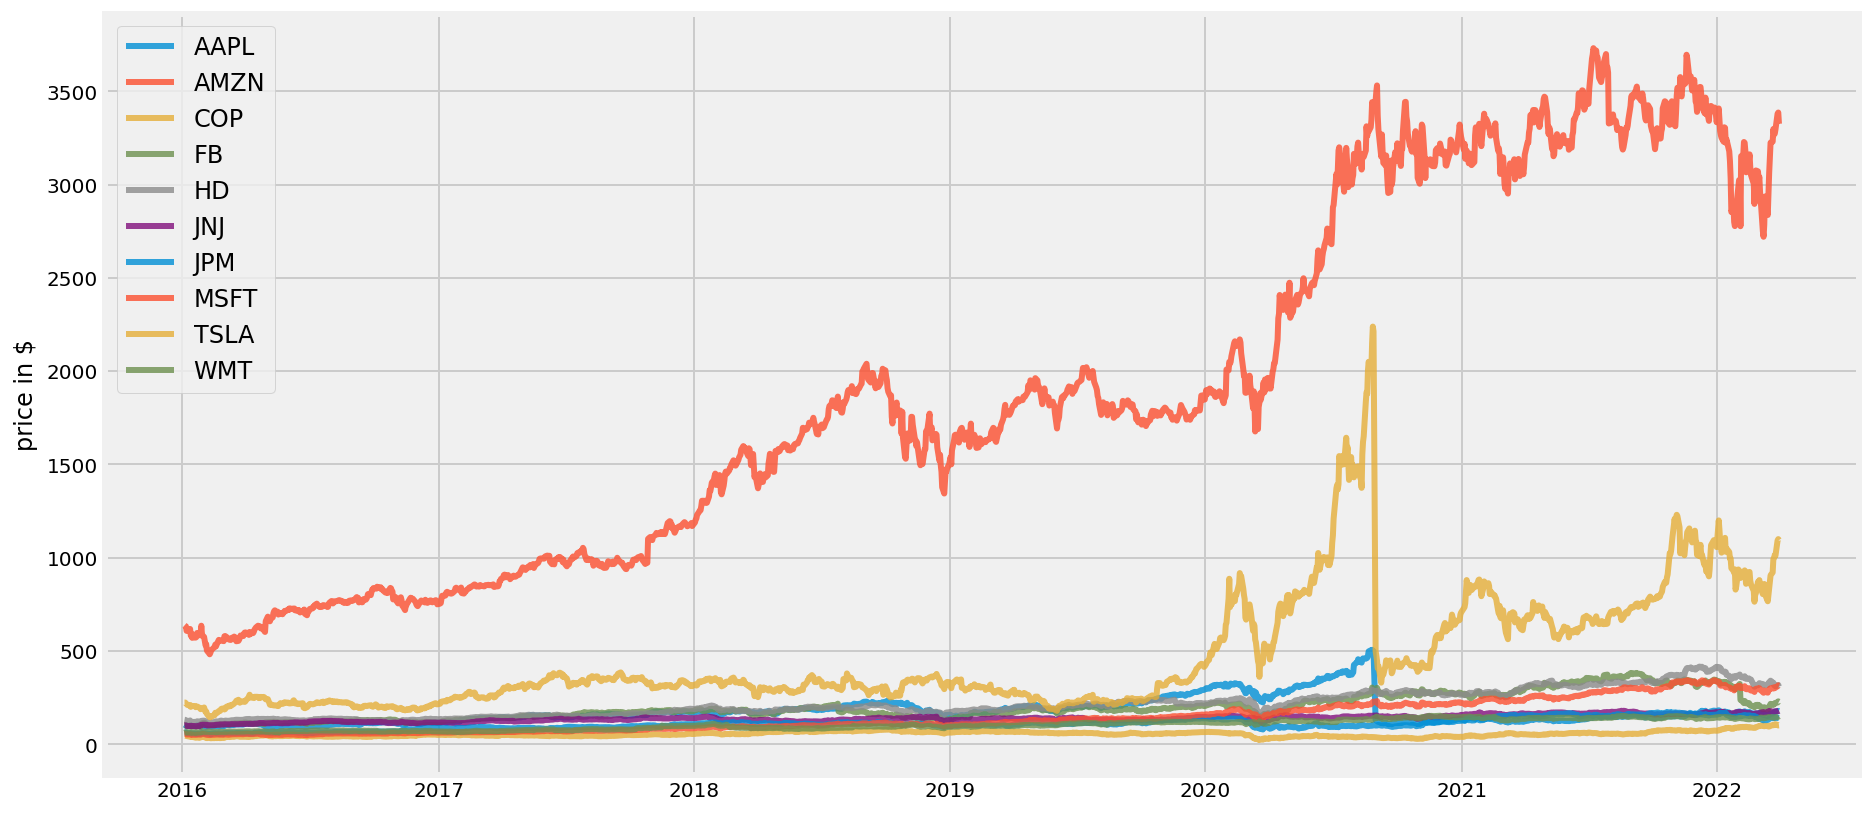

In [ ]:
plt.figure(figsize=(14, 7))
for c in table.columns.values:
    plt.plot(table.index, table[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

Another way to plot this is plotting daily returns (percent change compared to the day before). By plotting daily returns instead of actual prices, we can see the stocks' volatility.

Text(0, 0.5, 'daily returns')

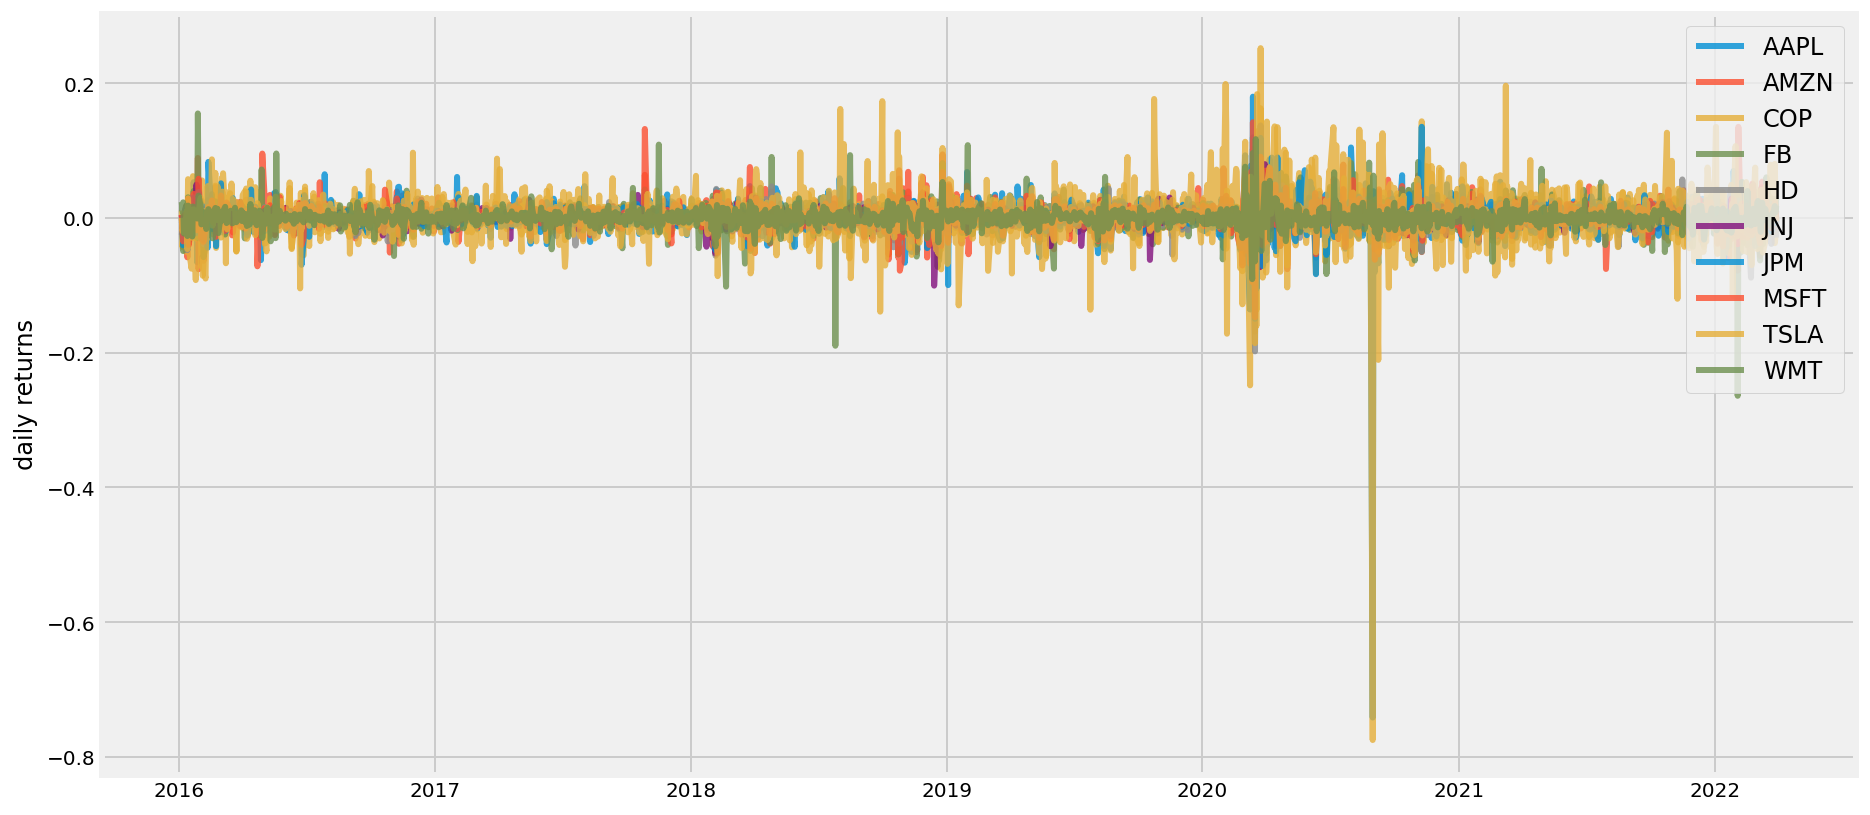

In [ ]:
returns = table.pct_change()

plt.figure(figsize=(14, 7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

In [ ]:
returns.describe()

,AAPL,AMZN,COP,FB,HD,JNJ,JPM,MSFT,TSLA,WMT
count,1571.000000,1571.000000,1571.000000,1571.000000,1571.000000,1571.000000,1571.000000,1571.000000,1571.000000,1571.000000
mean,0.000895,0.001234,0.000838,0.000753,0.000672,0.000442,0.000675,0.001256,0.002125,0.000658
std,0.026354,0.019121,0.026353,0.021755,0.015812,0.012041,0.018497,0.017024,0.041273,0.013474
min,-0.741522,-0.079221,-0.248401,-0.263901,-0.197938,-0.100379,-0.149649,-0.147390,-0.774862,-0.101832
25%,-0.006677,-0.007519,-0.011754,-0.008322,-0.005609,-0.004644,-0.007231,-0.005906,-0.014911,-0.005556
50%,0.000988,0.001390,0.000000,0.001050,0.001029,0.000371,0.000259,0.001036,0.001367,0.000526
75%,0.010258,0.010611,0.013214,0.011577,0.007966,0.005927,0.008627,0.009669,0.019257,0.006585
max,0.119808,0.135359,0.252139,0.155214,0.137508,0.079977,0.180125,0.142169,0.198949,0.117085


### Source: https://www.fredasongdrechsler.com/intro-to-python-for-fnce/sp500-constituents

Reference: Drechsler, Qingyi (Freda) S., 2022, Python Programs for Empirical Finance, https://www.fredasongdrechsler.com

##### Extending her code, I modified .....

In [ ]:
sp500 = conn.raw_sql("""
                        select a.*, b.date, b.ret
                        from crsp.msp500list as a,
                        crsp.msf as b
                        where a.permno=b.permno
                        and b.date >= a.start and b.date<= a.ending
                        and b.date>='01/01/2000'
                        order by date;
                        """, date_cols=['start', 'ending', 'date'])

In [ ]:
# Add Other Descriptive Variables

mse = conn.raw_sql("""
                        select comnam, ncusip, namedt, nameendt, 
                        permno, shrcd, exchcd, hsiccd, ticker
                        from crsp.msenames
                        """, date_cols=['namedt', 'nameendt'])

# if nameendt is missing then set to today date
mse['nameendt']=mse['nameendt'].fillna(pd.to_datetime('today'))

# Merge with SP500 data
sp500_full = pd.merge(sp500, mse, how = 'left', on = 'permno')

# Impose the date range restrictions
sp500_full = sp500_full.loc[(sp500_full.date>=sp500_full.namedt) \
                            & (sp500_full.date<=sp500_full.nameendt)]

In [ ]:
# Linking with Compustat through CCM

ccm=conn.raw_sql("""
                  select gvkey, liid as iid, lpermno as permno, linktype, linkprim, 
                  linkdt, linkenddt
                  from crsp.ccmxpf_linktable
                  where substr(linktype,1,1)='L'
                  and (linkprim ='C' or linkprim='P')
                  """, date_cols=['linkdt', 'linkenddt'])

# if linkenddt is missing then set to today date
ccm['linkenddt']=ccm['linkenddt'].fillna(pd.to_datetime('today'))

# Merge the CCM data with S&P500 data
# First just link by matching PERMNO
sp500ccm = pd.merge(sp500_full, ccm, how='left', on=['permno'])

# Then set link date bounds
sp500ccm = sp500ccm.loc[(sp500ccm['date']>=sp500ccm['linkdt'])\
                        &(sp500ccm['date']<=sp500ccm['linkenddt'])]

# Rearrange columns for final output

sp500ccm = sp500ccm.drop(columns=['namedt', 'nameendt', \
                                  'linktype', 'linkprim', 'linkdt', 'linkenddt'])
sp500ccm = sp500ccm[['date', 'permno', 'comnam', 'ncusip', 'shrcd', 'exchcd', 'hsiccd', 'ticker', \
                     'gvkey', 'iid', 'start', 'ending', 'ret']]

In [ ]:
sp500ccm

,date,permno,comnam,ncusip,shrcd,exchcd,hsiccd,ticker,gvkey,iid,start,ending,ret
0,2000-01-31,40416.0,AVON PRODUCTS INC,05430310,11.0,1.0,2844.0,AVP,001920,01,1967-05-18,2015-03-20,-0.035985
1,2000-01-31,44062.0,SPRINGS INDUSTRIES INC,85178310,11.0,1.0,2221.0,SMI,009963,01,1967-06-29,2000-12-11,-0.089202
2,2000-01-31,26403.0,DISNEY WALT CO,25468710,11.0,1.0,4833.0,DIS,003980,01,1976-07-01,2022-03-31,0.241453
3,2000-01-31,60628.0,FEDEX CORP,31428X10,11.0,1.0,4513.0,FDX,004598,01,1980-11-06,2022-03-31,-0.033588
4,2000-01-31,69032.0,MORGAN STANLEY DEAN WITTER & CO,61744644,11.0,1.0,6282.0,MWD,012124,01,1995-09-22,2022-03-31,-0.069002
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169638,2022-03-31,17478.0,S & P GLOBAL INC,78409V10,11.0,1.0,6282.0,SPGI,007163,01,1957-03-01,2022-03-31,0.091775
169639,2022-03-31,91152.0,TRANSDIGM GROUP INC,89364110,11.0,1.0,3728.0,TDG,148349,01,2016-06-03,2022-03-31,-0.022578
169641,2022-03-31,24985.0,AMEREN CORP,02360810,11.0,1.0,4911.0,AEE,010860,01,1991-09-20,2022-03-31,0.097731
169642,2022-03-31,29946.0,BROWN FORMAN CORP,11563720,11.0,1.0,2085.0,BF,002435,01,1982-10-14,2022-03-31,0.030331


In [30]:
conn.describe_table('crsp','msi')

Approximately 1156 rows in crsp.msi.


,name,nullable,type
0,date,True,DATE
1,vwretd,True,DOUBLE_PRECISION
2,vwretx,True,DOUBLE_PRECISION
3,ewretd,True,DOUBLE_PRECISION
4,ewretx,True,DOUBLE_PRECISION
5,sprtrn,True,DOUBLE_PRECISION
6,spindx,True,DOUBLE_PRECISION
7,totval,True,DOUBLE_PRECISION
8,totcnt,True,DOUBLE_PRECISION
9,usdval,True,DOUBLE_PRECISION


In [32]:
crsp_msi = conn.raw_sql("""
                      SELECT *
                      FROM crsp.msi 
                      WHERE date BETWEEN '01/01/2020' AND '12/31/2021'
                      """, date_cols = ['date']) 

crsp_msi

,date,vwretd,vwretx,ewretd,ewretx,sprtrn,spindx,totval,totcnt,usdval,usdcnt
0,2020-01-31,-0.001728,-0.002849,-0.013334,-0.014200,-0.001628,3225.52,4.105976e+10,7267.0,4.111595e+10,7225.0
1,2020-02-28,-0.077918,-0.079868,-0.069814,-0.071321,-0.084110,2954.22,3.777752e+10,7253.0,4.104252e+10,7213.0
2,2020-03-31,-0.141733,-0.143685,-0.207501,-0.209773,-0.125119,2584.59,3.233352e+10,7226.0,3.774818e+10,7209.0
3,2020-04-30,0.129674,0.128408,0.153867,0.152519,0.126844,2912.43,3.650329e+10,7224.0,3.223454e+10,7195.0
4,2020-05-29,0.053739,0.051688,0.064070,0.062277,0.045282,3044.31,3.838482e+10,7217.0,3.642426e+10,7187.0
5,2020-06-30,0.025299,0.023522,0.057391,0.054855,0.018388,3100.29,3.943612e+10,7244.0,3.836352e+10,7177.0
6,2020-07-31,0.055529,0.054408,0.040737,0.039671,0.055101,3271.12,4.171822e+10,7273.0,3.941430e+10,7212.0
7,2020-08-31,0.068442,0.066798,0.038884,0.037315,0.070065,3500.31,4.460940e+10,7286.0,4.170614e+10,7230.0
8,2020-09-30,-0.035056,-0.036515,-0.027356,-0.029264,-0.039228,3363.00,4.312178e+10,7336.0,4.460255e+10,7249.0
9,2020-10-30,-0.020178,-0.021218,0.000584,-0.000483,-0.027666,3269.96,4.229818e+10,7397.0,4.302700e+10,7289.0
